# N-gram Language Models

**Course:** Natural Language Processing  
**Topic:** Statistical Language Models - N-grams  

## Setup and Imports

In [1]:
import numpy as np
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

## Training Corpus

In [2]:
# Training corpus from the slides
corpus = [
    "<s> I am Sam </s>",
    "<s> Sam I am </s>",
    "<s> I do not like green eggs and ham </s>"
]

print("Training Corpus:")
for i, sentence in enumerate(corpus, 1):
    print(f"{i}. {sentence}")

Training Corpus:
1. <s> I am Sam </s>
2. <s> Sam I am </s>
3. <s> I do not like green eggs and ham </s>


## 1. Basic Tokenization and Counting Functions

In [3]:
def tokenize_corpus(corpus: List[str]) -> List[List[str]]:
    """Tokenize corpus by splitting on whitespace."""
    return [sentence.split() for sentence in corpus]

def build_vocabulary(tokenized_corpus: List[List[str]]) -> set:
    """Build vocabulary from tokenized corpus."""
    vocab = set()
    for tokens in tokenized_corpus:
        vocab.update(tokens)
    return vocab

def count_unigrams(tokenized_corpus: List[List[str]]) -> Counter:
    """Count unigram frequencies."""
    unigram_counts = Counter()
    for tokens in tokenized_corpus:
        for token in tokens:
            unigram_counts[token] += 1
    return unigram_counts

def count_bigrams(tokenized_corpus: List[List[str]]) -> Counter:
    """Count bigram frequencies."""
    bigram_counts = Counter()
    for tokens in tokenized_corpus:
        for i in range(len(tokens) - 1):
            bigram = (tokens[i], tokens[i + 1])
            bigram_counts[bigram] += 1
    return bigram_counts

def count_trigrams(tokenized_corpus: List[List[str]]) -> Counter:
    """Count trigram frequencies."""
    trigram_counts = Counter()
    for tokens in tokenized_corpus:
        for i in range(len(tokens) - 2):
            trigram = (tokens[i], tokens[i + 1], tokens[i + 2])
            trigram_counts[trigram] += 1
    return trigram_counts

# Tokenize and count
tokenized_corpus = tokenize_corpus(corpus)
vocab = build_vocabulary(tokenized_corpus)
unigram_counts = count_unigrams(tokenized_corpus)
bigram_counts = count_bigrams(tokenized_corpus)
trigram_counts = count_trigrams(tokenized_corpus)

print(f"\nVocabulary size: {len(vocab)}")
print(f"Total unigrams: {sum(unigram_counts.values())}")
print(f"Total bigrams: {sum(bigram_counts.values())}")
print(f"Total trigrams: {sum(trigram_counts.values())}")


Vocabulary size: 12
Total unigrams: 20
Total bigrams: 17
Total trigrams: 14


## 2. Display Counts

In [4]:
print("Unigram Counts:")
for word, count in sorted(unigram_counts.items()):
    print(f"  {word}: {count}")

print("\nBigram Counts:")
for bigram, count in sorted(bigram_counts.items()):
    print(f"  {bigram}: {count}")

print("\nTrigram Counts:")
for trigram, count in sorted(trigram_counts.items()):
    print(f"  {trigram}: {count}")

Unigram Counts:
  </s>: 3
  <s>: 3
  I: 3
  Sam: 2
  am: 2
  and: 1
  do: 1
  eggs: 1
  green: 1
  ham: 1
  like: 1
  not: 1

Bigram Counts:
  ('<s>', 'I'): 2
  ('<s>', 'Sam'): 1
  ('I', 'am'): 2
  ('I', 'do'): 1
  ('Sam', '</s>'): 1
  ('Sam', 'I'): 1
  ('am', '</s>'): 1
  ('am', 'Sam'): 1
  ('and', 'ham'): 1
  ('do', 'not'): 1
  ('eggs', 'and'): 1
  ('green', 'eggs'): 1
  ('ham', '</s>'): 1
  ('like', 'green'): 1
  ('not', 'like'): 1

Trigram Counts:
  ('<s>', 'I', 'am'): 1
  ('<s>', 'I', 'do'): 1
  ('<s>', 'Sam', 'I'): 1
  ('I', 'am', '</s>'): 1
  ('I', 'am', 'Sam'): 1
  ('I', 'do', 'not'): 1
  ('Sam', 'I', 'am'): 1
  ('am', 'Sam', '</s>'): 1
  ('and', 'ham', '</s>'): 1
  ('do', 'not', 'like'): 1
  ('eggs', 'and', 'ham'): 1
  ('green', 'eggs', 'and'): 1
  ('like', 'green', 'eggs'): 1
  ('not', 'like', 'green'): 1


## 3. Unigram Model

In [5]:
class UnigramModel:
    """Unigram language model."""

    def __init__(self, tokenized_corpus: List[List[str]]):
        self.unigram_counts = count_unigrams(tokenized_corpus)
        self.total_words = sum(self.unigram_counts.values())

    def probability(self, word: str) -> float:
        """Calculate P(word)."""
        return self.unigram_counts.get(word, 0) / self.total_words

    def log_probability(self, word: str) -> float:
        """Calculate log P(word)."""
        prob = self.probability(word)
        return np.log(prob) if prob > 0 else float('-inf')

    def sentence_probability(self, sentence: List[str]) -> float:
        """Calculate P(sentence) = product of P(wi)."""
        prob = 1.0
        for word in sentence:
            prob *= self.probability(word)
        return prob

    def sentence_log_probability(self, sentence: List[str]) -> float:
        """Calculate log P(sentence) = sum of log P(wi)."""
        log_prob = 0.0
        for word in sentence:
            log_prob += self.log_probability(word)
        return log_prob

# Create and test unigram model
unigram_model = UnigramModel(tokenized_corpus)

print("Unigram Model - Probabilities:")
test_words = ["I", "am", "Sam", "<s>", "</s>", "not", "green"]
for word in test_words:
    prob = unigram_model.probability(word)
    print(f"  P({word}) = {prob:.4f}")

# Test on a sentence
test_sentence = ["<s>", "I", "am", "Sam", "</s>"]
sent_prob = unigram_model.sentence_probability(test_sentence)
sent_log_prob = unigram_model.sentence_log_probability(test_sentence)
print(f"\nP('{' '.join(test_sentence)}') = {sent_prob:.10f}")
print(f"log P('{' '.join(test_sentence)}') = {sent_log_prob:.6f}")

Unigram Model - Probabilities:
  P(I) = 0.1500
  P(am) = 0.1000
  P(Sam) = 0.1000
  P(<s>) = 0.1500
  P(</s>) = 0.1500
  P(not) = 0.0500
  P(green) = 0.0500

P('<s> I am Sam </s>') = 0.0000337500
log P('<s> I am Sam </s>') = -10.296530


## 4. Bigram Model

In [6]:
class BigramModel:
    """Bigram language model."""

    def __init__(self, tokenized_corpus: List[List[str]]):
        self.unigram_counts = count_unigrams(tokenized_corpus)
        self.bigram_counts = count_bigrams(tokenized_corpus)

    def probability(self, word: str, previous_word: str) -> float:
        """Calculate P(word | previous_word)."""
        bigram = (previous_word, word)
        bigram_count = self.bigram_counts.get(bigram, 0)
        unigram_count = self.unigram_counts.get(previous_word, 0)

        if unigram_count == 0:
            return 0.0

        return bigram_count / unigram_count

    def log_probability(self, word: str, previous_word: str) -> float:
        """Calculate log P(word | previous_word)."""
        prob = self.probability(word, previous_word)
        return np.log(prob) if prob > 0 else float('-inf')

    def sentence_probability(self, sentence: List[str]) -> float:
        """Calculate P(sentence) using bigram model."""
        if len(sentence) < 2:
            return 0.0

        prob = 1.0
        for i in range(1, len(sentence)):
            prob *= self.probability(sentence[i], sentence[i-1])
        return prob

    def sentence_log_probability(self, sentence: List[str]) -> float:
        """Calculate log P(sentence) using bigram model."""
        if len(sentence) < 2:
            return float('-inf')

        log_prob = 0.0
        for i in range(1, len(sentence)):
            log_prob += self.log_probability(sentence[i], sentence[i-1])
        return log_prob

# Create and test bigram model
bigram_model = BigramModel(tokenized_corpus)

print("Bigram Model - Probabilities (from slides):")
test_bigrams = [
    ("<s>", "I"),
    ("<s>", "Sam"),
    ("I", "am"),
    ("I", "do"),
    ("am", "Sam"),
    ("am", "</s>"),
    ("Sam", "I"),
    ("Sam", "</s>")
]

for w1, w2 in test_bigrams:
    prob = bigram_model.probability(w2, w1)
    print(f"  P({w2} | {w1}) = {prob:.4f}")

# Verify against slide examples
print("\nVerification against slides:")
print(f"  P(I | <s>) = {bigram_model.probability('I', '<s>'):.4f} (expected: 0.6667)")
print(f"  P(Sam | <s>) = {bigram_model.probability('Sam', '<s>'):.4f} (expected: 0.3333)")
print(f"  P(am | I) = {bigram_model.probability('am', 'I'):.4f} (expected: 0.6667)")
print(f"  P(</s> | Sam) = {bigram_model.probability('</s>', 'Sam'):.4f} (expected: 0.5000)")

Bigram Model - Probabilities (from slides):
  P(I | <s>) = 0.6667
  P(Sam | <s>) = 0.3333
  P(am | I) = 0.6667
  P(do | I) = 0.3333
  P(Sam | am) = 0.5000
  P(</s> | am) = 0.5000
  P(I | Sam) = 0.5000
  P(</s> | Sam) = 0.5000

Verification against slides:
  P(I | <s>) = 0.6667 (expected: 0.6667)
  P(Sam | <s>) = 0.3333 (expected: 0.3333)
  P(am | I) = 0.6667 (expected: 0.6667)
  P(</s> | Sam) = 0.5000 (expected: 0.5000)


## 5. All Bigram Probabilities (as shown in slides)

In [18]:
print("All Bigram Probabilities:")
print("=" * 60)

# Get all unique bigrams
all_bigrams = sorted(bigram_counts.keys())

for bigram in all_bigrams:
    w1, w2 = bigram
    prob = bigram_model.probability(w2, w1)
    count = bigram_counts[bigram]
    context_count = unigram_counts[w1]
    print(f"P({w2} | {w1}) = {count}/{context_count} = {prob:.4f}")

All Bigram Probabilities:
P(I | <s>) = 2/3 = 0.6667
P(Sam | <s>) = 1/3 = 0.3333
P(am | I) = 2/3 = 0.6667
P(do | I) = 1/3 = 0.3333
P(</s> | Sam) = 1/2 = 0.5000
P(I | Sam) = 1/2 = 0.5000
P(</s> | am) = 1/2 = 0.5000
P(Sam | am) = 1/2 = 0.5000
P(ham | and) = 1/1 = 1.0000
P(not | do) = 1/1 = 1.0000
P(and | eggs) = 1/1 = 1.0000
P(eggs | green) = 1/1 = 1.0000
P(</s> | ham) = 1/1 = 1.0000
P(green | like) = 1/1 = 1.0000
P(like | not) = 1/1 = 1.0000


## 6. Trigram Model

In [19]:
class TrigramModel:
    """Trigram language model."""

    def __init__(self, tokenized_corpus: List[List[str]]):
        self.bigram_counts = count_bigrams(tokenized_corpus)
        self.trigram_counts = count_trigrams(tokenized_corpus)

    def probability(self, word: str, prev_word1: str, prev_word2: str) -> float:
        """Calculate P(word | prev_word2, prev_word1).
        Note: prev_word2 comes before prev_word1.
        """
        trigram = (prev_word2, prev_word1, word)
        bigram = (prev_word2, prev_word1)

        trigram_count = self.trigram_counts.get(trigram, 0)
        bigram_count = self.bigram_counts.get(bigram, 0)

        if bigram_count == 0:
            return 0.0

        return trigram_count / bigram_count

    def log_probability(self, word: str, prev_word1: str, prev_word2: str) -> float:
        """Calculate log P(word | prev_word2, prev_word1)."""
        prob = self.probability(word, prev_word1, prev_word2)
        return np.log(prob) if prob > 0 else float('-inf')

    def sentence_probability(self, sentence: List[str]) -> float:
        """Calculate P(sentence) using trigram model."""
        if len(sentence) < 3:
            return 0.0

        prob = 1.0
        for i in range(2, len(sentence)):
            prob *= self.probability(sentence[i], sentence[i-1], sentence[i-2])
        return prob

    def sentence_log_probability(self, sentence: List[str]) -> float:
        """Calculate log P(sentence) using trigram model."""
        if len(sentence) < 3:
            return float('-inf')

        log_prob = 0.0
        for i in range(2, len(sentence)):
            log_prob += self.log_probability(sentence[i], sentence[i-1], sentence[i-2])
        return log_prob

# Create and test trigram model
trigram_model = TrigramModel(tokenized_corpus)

print("Trigram Model - Sample Probabilities:")
test_trigrams = [
    ("<s>", "I", "am"),
    ("I", "am", "Sam"),
    ("am", "Sam", "</s>"),
    ("<s>", "I", "do"),
    ("I", "do", "not"),
]

for w1, w2, w3 in test_trigrams:
    prob = trigram_model.probability(w3, w2, w1)
    print(f"  P({w3} | {w1}, {w2}) = {prob:.4f}")

Trigram Model - Sample Probabilities:
  P(am | <s>, I) = 0.5000
  P(Sam | I, am) = 0.5000
  P(</s> | am, Sam) = 1.0000
  P(do | <s>, I) = 0.5000
  P(not | I, do) = 1.0000


## 7. Text Generation

In [20]:
class BigramGenerator:
    """Generate text using bigram model."""

    def __init__(self, tokenized_corpus: List[List[str]]):
        self.unigram_counts = count_unigrams(tokenized_corpus)
        self.bigram_counts = count_bigrams(tokenized_corpus)
        self.next_word_probs = self._build_next_word_distribution()

    def _build_next_word_distribution(self) -> Dict:
        """Build distribution over next words for each word."""
        next_word_dist = defaultdict(lambda: defaultdict(float))

        for (w1, w2), count in self.bigram_counts.items():
            next_word_dist[w1][w2] = count / self.unigram_counts[w1]

        return next_word_dist

    def generate(self, max_length: int = 20, start_token: str = "<s>") -> List[str]:
        """Generate a sentence."""
        sentence = [start_token]

        for _ in range(max_length):
            current_word = sentence[-1]

            if current_word not in self.next_word_probs:
                break

            next_words = list(self.next_word_probs[current_word].keys())
            next_probs = list(self.next_word_probs[current_word].values())

            next_word = np.random.choice(next_words, p=next_probs)
            sentence.append(next_word)

            if next_word == "</s>":
                break

        return sentence

# Generate sentences
generator = BigramGenerator(tokenized_corpus)

print("Generated Sentences (Bigram Model):")
print("=" * 60)
for i in range(10):
    sentence = generator.generate()
    print(f"{i+1}. {' '.join(sentence)}")

Generated Sentences (Bigram Model):
1. <s> Sam </s>
2. <s> I am Sam </s>
3. <s> I am Sam </s>
4. <s> Sam </s>
5. <s> I am </s>
6. <s> I do not like green eggs and ham </s>
7. <s> I do not like green eggs and ham </s>
8. <s> I am Sam I am </s>
9. <s> I am Sam I do not like green eggs and ham </s>
10. <s> Sam I am Sam </s>


## 8. Perplexity Calculation

In [21]:
def calculate_perplexity(model, test_sentences: List[List[str]], model_type: str = "bigram") -> float:
    """
    Calculate perplexity for a language model.

    Perplexity = exp(-1/N * sum(log P(wi | context)))
    """
    total_log_prob = 0.0
    total_words = 0

    for sentence in test_sentences:
        if model_type == "unigram":
            log_prob = model.sentence_log_probability(sentence)
            n_words = len(sentence)
        elif model_type == "bigram":
            log_prob = model.sentence_log_probability(sentence)
            n_words = len(sentence) - 1  # Exclude <s>
        elif model_type == "trigram":
            log_prob = model.sentence_log_probability(sentence)
            n_words = len(sentence) - 2  # Exclude <s> and first word

        if log_prob == float('-inf'):
            return float('inf')

        total_log_prob += log_prob
        total_words += n_words

    avg_log_prob = total_log_prob / total_words
    perplexity = np.exp(-avg_log_prob)

    return perplexity

# Calculate perplexity on training data
print("Perplexity on Training Data:")
print("=" * 60)

unigram_perplexity = calculate_perplexity(unigram_model, tokenized_corpus, "unigram")
bigram_perplexity = calculate_perplexity(bigram_model, tokenized_corpus, "bigram")
trigram_perplexity = calculate_perplexity(trigram_model, tokenized_corpus, "trigram")

print(f"Unigram Perplexity:  {unigram_perplexity:.4f}")
print(f"Bigram Perplexity:   {bigram_perplexity:.4f}")
print(f"Trigram Perplexity:  {trigram_perplexity:.4f}")
print("\nNote: Lower perplexity = better model")
print("Note: These are on training data (not ideal for evaluation)")

Perplexity on Training Data:
Unigram Perplexity:  10.6199
Bigram Perplexity:   1.4737
Trigram Perplexity:  1.2190

Note: Lower perplexity = better model
Note: These are on training data (not ideal for evaluation)


## 9. Smoothed Bigram Model (Add-One Smoothing)

In [22]:
class BigramModelSmoothed:
    """Bigram model with add-one (Laplace) smoothing."""

    def __init__(self, tokenized_corpus: List[List[str]]):
        self.unigram_counts = count_unigrams(tokenized_corpus)
        self.bigram_counts = count_bigrams(tokenized_corpus)
        self.vocab = build_vocabulary(tokenized_corpus)
        self.vocab_size = len(self.vocab)

    def probability(self, word: str, previous_word: str) -> float:
        """Calculate P(word | previous_word) with add-one smoothing.

        P(wi | wi-1) = (C(wi-1, wi) + 1) / (C(wi-1) + V)
        where V is vocabulary size
        """
        bigram = (previous_word, word)
        bigram_count = self.bigram_counts.get(bigram, 0)
        unigram_count = self.unigram_counts.get(previous_word, 0)

        return (bigram_count + 1) / (unigram_count + self.vocab_size)

    def log_probability(self, word: str, previous_word: str) -> float:
        """Calculate log P(word | previous_word)."""
        prob = self.probability(word, previous_word)
        return np.log(prob)

    def sentence_probability(self, sentence: List[str]) -> float:
        """Calculate P(sentence) using smoothed bigram model."""
        if len(sentence) < 2:
            return 0.0

        prob = 1.0
        for i in range(1, len(sentence)):
            prob *= self.probability(sentence[i], sentence[i-1])
        return prob

    def sentence_log_probability(self, sentence: List[str]) -> float:
        """Calculate log P(sentence) using smoothed bigram model."""
        if len(sentence) < 2:
            return float('-inf')

        log_prob = 0.0
        for i in range(1, len(sentence)):
            log_prob += self.log_probability(sentence[i], sentence[i-1])
        return log_prob

# Create smoothed model
smoothed_bigram_model = BigramModelSmoothed(tokenized_corpus)

# Compare with unsmoothed on unseen bigrams
print("Comparison: Unsmoothed vs Smoothed Bigram Model")
print("=" * 60)

test_cases = [
    ("I", "love"),  # Unseen bigram
    ("Sam", "likes"),  # Unseen bigram
    ("I", "am"),  # Seen bigram
]

for w1, w2 in test_cases:
    unsmoothed = bigram_model.probability(w2, w1)
    smoothed = smoothed_bigram_model.probability(w2, w1)
    print(f"P({w2} | {w1}):")
    print(f"  Unsmoothed: {unsmoothed:.6f}")
    print(f"  Smoothed:   {smoothed:.6f}")
    print()

Comparison: Unsmoothed vs Smoothed Bigram Model
P(love | I):
  Unsmoothed: 0.000000
  Smoothed:   0.066667

P(likes | Sam):
  Unsmoothed: 0.000000
  Smoothed:   0.071429

P(am | I):
  Unsmoothed: 0.666667
  Smoothed:   0.200000



## 10. Working with a Larger Corpus

In [23]:
# Larger corpus for more interesting results
larger_corpus = [
    "<s> I love natural language processing </s>",
    "<s> Natural language processing is fascinating </s>",
    "<s> I study natural language processing at university </s>",
    "<s> Language models are powerful tools </s>",
    "<s> I love working with language models </s>",
    "<s> Processing natural language is challenging </s>",
    "<s> Machine learning helps with natural language </s>",
    "<s> I enjoy learning about language models </s>",
    "<s> Deep learning revolutionized natural language processing </s>",
    "<s> Transformers are state of the art language models </s>",
]

# Tokenize
larger_tokenized = tokenize_corpus(larger_corpus)

# Build models
large_unigram = UnigramModel(larger_tokenized)
large_bigram = BigramModel(larger_tokenized)
large_trigram = TrigramModel(larger_tokenized)

print("Larger Corpus Statistics:")
print("=" * 60)
large_vocab = build_vocabulary(larger_tokenized)
large_unigram_counts = count_unigrams(larger_tokenized)
large_bigram_counts = count_bigrams(larger_tokenized)

print(f"Vocabulary size: {len(large_vocab)}")
print(f"Total tokens: {sum(large_unigram_counts.values())}")
print(f"Unique bigrams: {len(large_bigram_counts)}")

# Calculate perplexities
print("\nPerplexities on Larger Corpus:")
large_uni_perp = calculate_perplexity(large_unigram, larger_tokenized, "unigram")
large_bi_perp = calculate_perplexity(large_bigram, larger_tokenized, "bigram")
large_tri_perp = calculate_perplexity(large_trigram, larger_tokenized, "trigram")

print(f"Unigram Perplexity:  {large_uni_perp:.4f}")
print(f"Bigram Perplexity:   {large_bi_perp:.4f}")
print(f"Trigram Perplexity:  {large_tri_perp:.4f}")

Larger Corpus Statistics:
Vocabulary size: 34
Total tokens: 79
Unique bigrams: 53

Perplexities on Larger Corpus:
Unigram Perplexity:  22.4625
Bigram Perplexity:   1.9999
Trigram Perplexity:  1.2776


## 11. Generate Text from Larger Corpus

In [24]:
# Generate from larger corpus
large_generator = BigramGenerator(larger_tokenized)

print("Generated Sentences from Larger Corpus:")
print("=" * 60)
for i in range(15):
    sentence = large_generator.generate(max_length=15)
    print(f"{i+1}. {' '.join(sentence)}")

Generated Sentences from Larger Corpus:
1. <s> Machine learning revolutionized natural language processing </s>
2. <s> Deep learning helps with natural language processing is challenging </s>
3. <s> I study natural language models </s>
4. <s> Deep learning about language processing </s>
5. <s> I enjoy learning revolutionized natural language models </s>
6. <s> Natural language models </s>
7. <s> I study natural language </s>
8. <s> Transformers are powerful tools </s>
9. <s> Transformers are state of the art language processing is challenging </s>
10. <s> Language models </s>
11. <s> Transformers are state of the art language processing </s>
12. <s> Deep learning revolutionized natural language models </s>
13. <s> Processing natural language </s>
14. <s> I love natural language processing </s>
15. <s> Language models </s>


## 12. Visualization: Probability Distributions

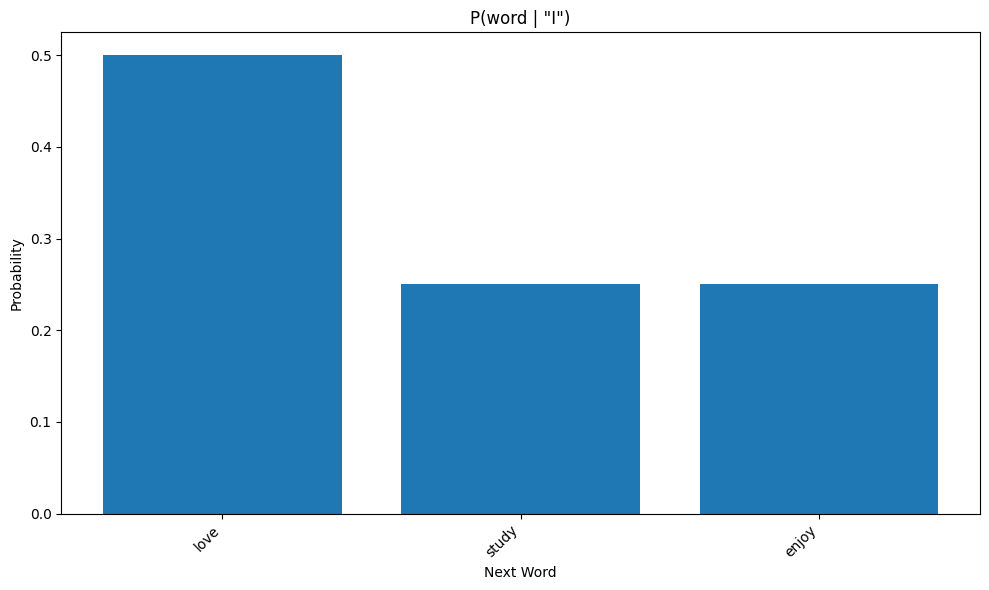

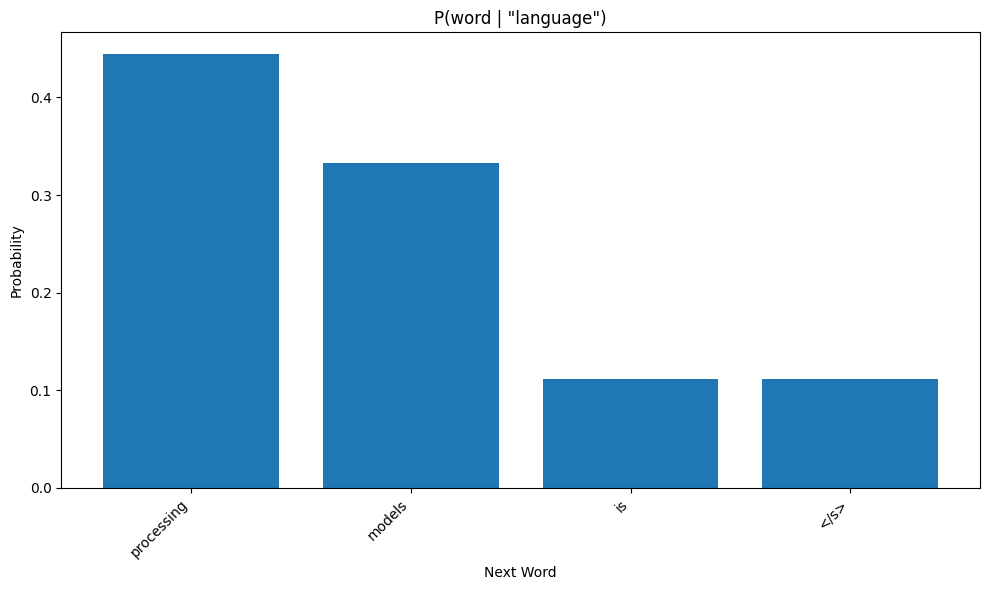

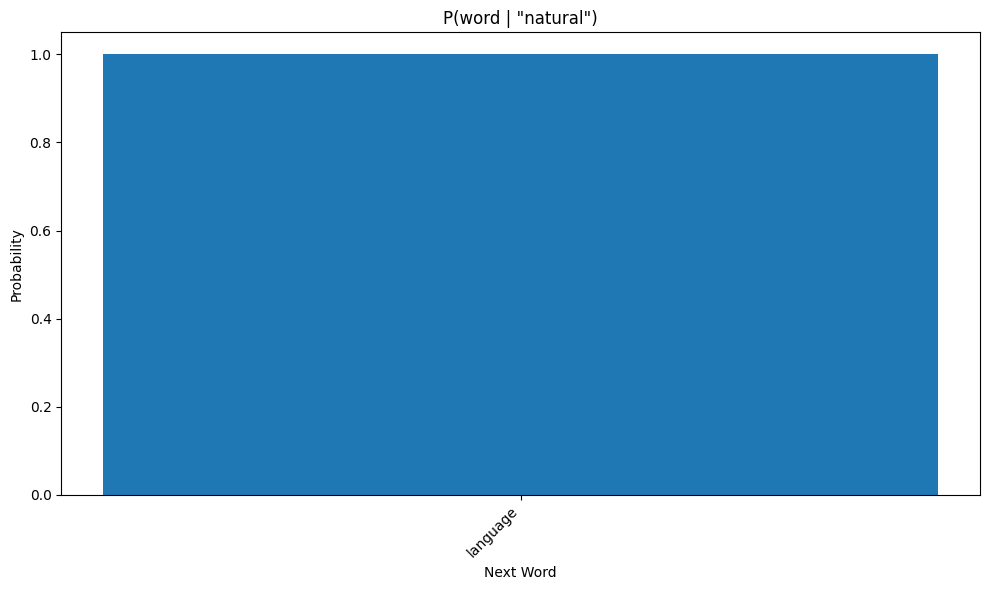

In [25]:
# Visualize next word probabilities for a given context
def plot_next_word_distribution(model: BigramModel, context_word: str, top_k: int = 10):
    """Plot distribution of next words given context."""
    # Get all possible next words
    next_words = {}
    for (w1, w2), count in model.bigram_counts.items():
        if w1 == context_word:
            next_words[w2] = model.probability(w2, w1)

    if not next_words:
        print(f"No data for context word: {context_word}")
        return

    # Sort by probability
    sorted_words = sorted(next_words.items(), key=lambda x: x[1], reverse=True)[:top_k]
    words, probs = zip(*sorted_words)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(words)), probs)
    plt.xticks(range(len(words)), words, rotation=45, ha='right')
    plt.xlabel('Next Word')
    plt.ylabel('Probability')
    plt.title(f'P(word | "{context_word}")')
    plt.tight_layout()
    plt.show()

# Plot for different context words
context_words = ["I", "language", "natural"]
for word in context_words:
    if word in large_unigram.unigram_counts:
        plot_next_word_distribution(large_bigram, word)

## 13. Model Comparison Summary

In [26]:
import pandas as pd

# Create comparison table
comparison_data = {
    'Model': ['Unigram', 'Bigram', 'Trigram'],
    'Context Size': [0, 1, 2],
    'Markov Order': [0, 1, 2],
    'Small Corpus Perplexity': [
        f"{unigram_perplexity:.2f}",
        f"{bigram_perplexity:.2f}",
        f"{trigram_perplexity:.2f}"
    ],
    'Large Corpus Perplexity': [
        f"{large_uni_perp:.2f}",
        f"{large_bi_perp:.2f}",
        f"{large_tri_perp:.2f}"
    ],
    'Advantages': [
        'Simple, fast',
        'Captures local context',
        'Better context modeling'
    ],
    'Disadvantages': [
        'No context',
        'Limited context',
        'Data sparsity'
    ]
}

df = pd.DataFrame(comparison_data)
print("\nN-gram Model Comparison:")
print("=" * 100)
print(df.to_string(index=False))


N-gram Model Comparison:
  Model  Context Size  Markov Order Small Corpus Perplexity Large Corpus Perplexity              Advantages   Disadvantages
Unigram             0             0                   10.62                   22.46            Simple, fast      No context
 Bigram             1             1                    1.47                    2.00  Captures local context Limited context
Trigram             2             2                    1.22                    1.28 Better context modeling   Data sparsity


## 14. Practical Example: Sentence Scoring

In [27]:
def score_sentences(model, sentences: List[str], model_type: str = "bigram") -> List[Tuple[str, float]]:
    """Score multiple sentences and return sorted by probability."""
    scores = []

    for sentence in sentences:
        tokens = sentence.split()

        if model_type == "bigram":
            log_prob = model.sentence_log_probability(tokens)
            prob = np.exp(log_prob) if log_prob != float('-inf') else 0.0
        elif model_type == "unigram":
            log_prob = model.sentence_log_probability(tokens)
            prob = np.exp(log_prob) if log_prob != float('-inf') else 0.0

        scores.append((sentence, prob, log_prob))

    return sorted(scores, key=lambda x: x[1], reverse=True)

# Test sentences
test_sentences = [
    "<s> I love natural language processing </s>",
    "<s> natural love I processing language </s>",  # Bad word order
    "<s> I love language models </s>",
    "<s> models language love I </s>",  # Bad word order
    "<s> natural language processing is fascinating </s>",
]

print("Sentence Scoring (Bigram Model on Large Corpus):")
print("=" * 80)
scores = score_sentences(large_bigram, test_sentences, "bigram")

for i, (sent, prob, log_prob) in enumerate(scores, 1):
    print(f"{i}. {sent}")
    print(f"   Probability: {prob:.10f}")
    print(f"   Log Probability: {log_prob:.4f}")
    print()

Sentence Scoring (Bigram Model on Large Corpus):
1. <s> I love natural language processing </s>
   Probability: 0.0222222222
   Log Probability: -3.8067

2. <s> natural love I processing language </s>
   Probability: 0.0000000000
   Log Probability: -inf

3. <s> I love language models </s>
   Probability: 0.0000000000
   Log Probability: -inf

4. <s> models language love I </s>
   Probability: 0.0000000000
   Log Probability: -inf

5. <s> natural language processing is fascinating </s>
   Probability: 0.0000000000
   Log Probability: -inf



## 15. Key Formulas Summary

In [28]:
print("Key Formulas for N-gram Language Models")
print("=" * 60)
print()
print("1. Unigram Model:")
print("   P(wi) = C(wi) / N")
print()
print("2. Bigram Model:")
print("   P(wi | wi-1) = C(wi-1, wi) / C(wi-1)")
print()
print("3. Trigram Model:")
print("   P(wi | wi-2, wi-1) = C(wi-2, wi-1, wi) / C(wi-2, wi-1)")
print()
print("4. Sentence Probability (Bigram):")
print("   P(w1...wn) = P(w1) * P(w2|w1) * P(w3|w2) * ... * P(wn|wn-1)")
print()
print("5. Log Space:")
print("   log P(w1...wn) = log P(w1) + log P(w2|w1) + ... + log P(wn|wn-1)")
print()
print("6. Perplexity:")
print("   PP(W) = P(w1...wN)^(-1/N)")
print("   PP(W) = exp(-1/N * sum(log P(wi | context)))")
print()
print("7. Add-One Smoothing:")
print("   P(wi | wi-1) = (C(wi-1, wi) + 1) / (C(wi-1) + V)")

Key Formulas for N-gram Language Models

1. Unigram Model:
   P(wi) = C(wi) / N

2. Bigram Model:
   P(wi | wi-1) = C(wi-1, wi) / C(wi-1)

3. Trigram Model:
   P(wi | wi-2, wi-1) = C(wi-2, wi-1, wi) / C(wi-2, wi-1)

4. Sentence Probability (Bigram):
   P(w1...wn) = P(w1) * P(w2|w1) * P(w3|w2) * ... * P(wn|wn-1)

5. Log Space:
   log P(w1...wn) = log P(w1) + log P(w2|w1) + ... + log P(wn|wn-1)

6. Perplexity:
   PP(W) = P(w1...wN)^(-1/N)
   PP(W) = exp(-1/N * sum(log P(wi | context)))

7. Add-One Smoothing:
   P(wi | wi-1) = (C(wi-1, wi) + 1) / (C(wi-1) + V)
